# **Facial Keypoints Detection**

In [1]:
# Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
# Load training et test data
train_df = pd.read_csv("dataset/training/training.csv")
test_df = pd.read_csv("dataset/test/test.csv")

print("Training dataset shape:", train_df.shape)
print("\nColumns:", train_df.columns.tolist())

Training dataset shape: (7049, 31)

Columns: ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']


In [3]:
# Show the dataset
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
# Check missing values
missing_info = train_df.isnull().sum()
print("Missing values per column:\n", missing_info[missing_info > 0])

Missing values per column:
 left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_bottom_lip_y      33
dtype: int64


In [5]:
# Impute missing values using forward-fill method
train_df.ffill(inplace=True)

In [6]:
# Check missing values
missing_info = train_df.isnull().sum()
print("Missing values per column:\n", missing_info[missing_info > 0])

Missing values per column:
 Series([], dtype: int64)


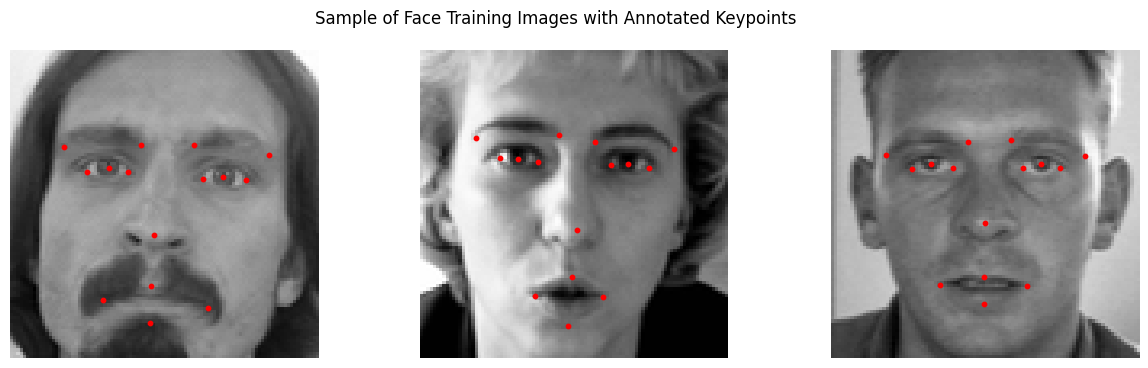

In [7]:
# Visualizing random examples from the dataset
def plot_sample_images(df, n=3):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        sample = df.dropna().iloc[i]
        image = np.fromstring(sample["Image"], sep=' ').reshape(96, 96)
        keypoints = sample.drop("Image").values.astype(float)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap='gray')
        plt.scatter(keypoints[0::2], keypoints[1::2], color='red', s=10)
        plt.axis("off")
    plt.suptitle("Sample of Face Training Images with Annotated Keypoints")
    plt.show()

plot_sample_images(train_df, n=3)

In [8]:
# Data Preprocessing
def preprocess(df):
    images = df["Image"].apply(lambda img: np.fromstring(img, sep=' ').reshape(96, 96, 1))
    images = np.stack(images.to_numpy()) / 255.0  # normalize

    keypoints = df.drop("Image", axis=1).values
    keypoints = keypoints.astype(np.float32) / 96  # normalize (0 to 1 range)
    
    return images, keypoints

X, y = preprocess(train_df)
print("Processed images shape (X):", X.shape)
print("Processed keypoints shape:", y.shape)

Processed images shape (X): (7049, 96, 96, 1)
Processed keypoints shape: (7049, 30)


In [9]:
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Train set: (6344, 96, 96, 1)
Validation set: (705, 96, 96, 1)


In [10]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [11]:
# Improved CNN Model
def create_model():
    model = Sequential([
        Input(shape=(96, 96, 1)),
        
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Dropout(0.1),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Dropout(0.2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(30)  # 15 (x, y) keypoints
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,663,070 (25.42 MB)

 Trainable params: 6,662,622 (25.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# Training
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=30,
    verbose=1
)

C:\Users\anton\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 864ms/step - loss: 1.8532 - mae: 0.8435 - val_loss: 0.3919 - val_mae: 0.5188
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - loss: 0.1397 - mae: 0.2588 - val_loss: 0.3306 - val_mae: 0.4192
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - loss: 0.0887 - mae: 0.1977 - val_loss: 0.0378 - val_mae: 0.1615
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 883ms/step - loss: 0.0639 - mae: 0.1667 - val_loss: 0.1239 - val_mae: 0.2261
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 975ms/step - loss: 0.0399 - mae: 0.1345 - val_loss: 0.0074 - val_mae: 0.0619
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - loss: 0.0320 - mae: 0.1130 - val_loss: 0.0081 - val_mae: 0.0654
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - loss: 0.0203 - mae: 0.0957 - val_loss: 0.0056 - val_mae: 0.0557
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - loss: 0.0181 - mae: 0.0821 - val_loss: 0.0044 - val_mae: 0.0490
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12

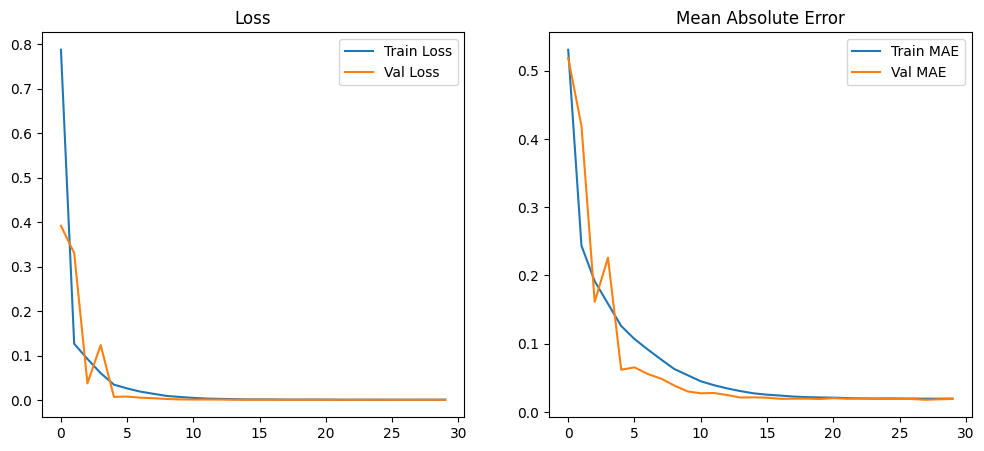

In [13]:
# Training Curves
def plot_history(hist):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['mae'], label='Train MAE')
    plt.plot(hist.history['val_mae'], label='Val MAE')
    plt.title('Mean Absolute Error')
    plt.legend()
    
    plt.show()

plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


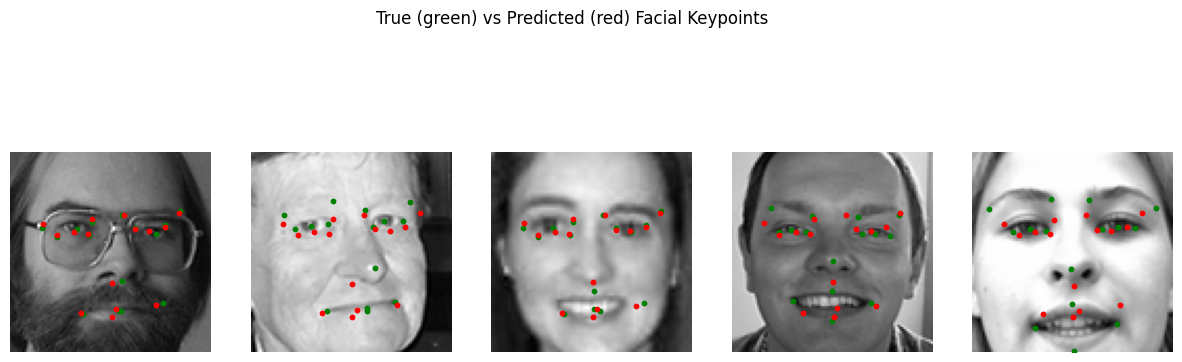

In [14]:
# Prediction Visualization
def visualize_predictions(X, y_true, model, n=3):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape(96, 96)
        true_kp = y_true[idx] * 96
        pred_kp = model.predict(X[idx][np.newaxis])[0] * 96

        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.scatter(true_kp[0::2], true_kp[1::2], color='green', label='True', s=10)
        plt.scatter(pred_kp[0::2], pred_kp[1::2], color='red', label='Pred', s=10)
        plt.axis('off')
    
    plt.suptitle("True (green) vs Predicted (red) Facial Keypoints")
    plt.show()

visualize_predictions(X_val, y_val, model, n=5)

In [15]:
# Save the Model
model.save("facial_keypoints_model.keras")
print("The model was saved as facial_keypoints_model.keras")

The model was saved as facial_keypoints_model.keras


# **Predictions on test images**

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


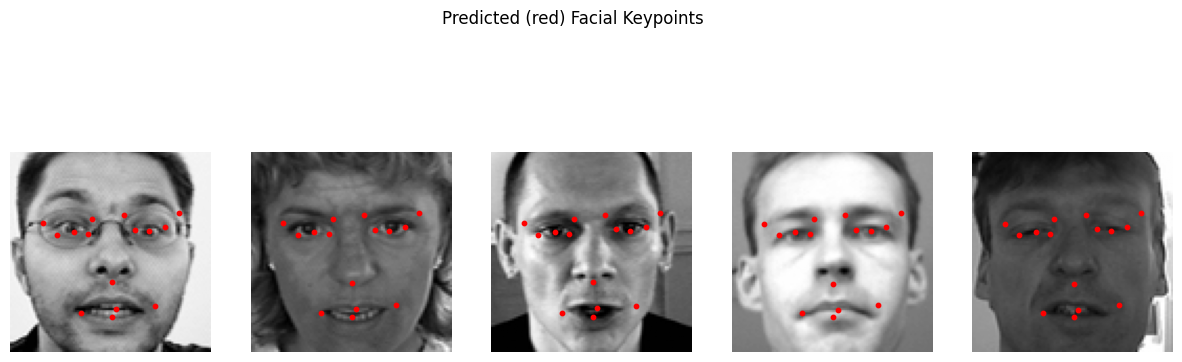

In [16]:
# Data Preprocessing
def preprocess_test_images(df):
    images = df["Image"].apply(lambda img: np.fromstring(img, sep=' ').reshape(96, 96, 1))
    images = np.stack(images.to_numpy()) / 255.0
    return images

# test_df preparation
X_test = preprocess_test_images(test_df)

# Prediction
y_pred = model.predict(X_test)

# Show some predictions
def plot_test_predictions(X_test, y_pred, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        image = X_test[i].reshape(96, 96)
        keypoints = y_pred[i] * 96  # denormalize
        plt.imshow(image, cmap='gray')
        plt.scatter(keypoints[0::2], keypoints[1::2], color='red', s=10)
        plt.axis("off")
    plt.suptitle("Predicted (red) Facial Keypoints")
    plt.show()

plot_test_predictions(X_test, y_pred, n=5)

# **Create Kaggle Submission CSV**

In [17]:
# Load the trained model
model = tf.keras.models.load_model("facial_keypoints_model.keras")

# Load test data and lookup table
test_df = pd.read_csv("dataset/test/test.csv")
lookup_df = pd.read_csv("dataset/IdLookupTable.csv")

print("Test images:", test_df.shape)
print("Lookup table:", lookup_df.shape)

Test images: (1783, 2)
Lookup table: (27124, 4)


In [18]:
# Convert string pixels to numpy arrays and normalize
def preprocess_test_images(df):
    images = df["Image"].apply(lambda img: np.fromstring(img, sep=' ').reshape(96, 96, 1))
    images = np.stack(images.to_numpy()) / 255.0
    return images

X_test = preprocess_test_images(test_df)
print("Processed test image shape:", X_test.shape)

Processed test image shape: (1783, 96, 96, 1)


In [19]:
# Predict facial keypoints for the test set
predictions = model.predict(X_test)

# Convert back to original pixel scale
predictions = predictions * 96  # denormalize to 0–96

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [20]:
# Create submission DataFrame
submission = lookup_df.copy()
predicted_coords = []

for idx, row in submission.iterrows():
    image_id = int(row['ImageId']) - 1  # 1-based to 0-based index
    feature_name = row['FeatureName']
    
    # Get predicted value for the specific feature
    feature_names = list(train_df.columns[:-1])  # drop 'Image' column
    feature_idx = feature_names.index(feature_name)
    
    predicted_value = predictions[image_id][feature_idx]
    predicted_coords.append(predicted_value)

submission["Location"] = predicted_coords

In [21]:
submission_file = "submission.csv"
submission[["RowId", "Location"]].to_csv(submission_file, index=False)
print(f"Submission file saved as: {submission_file}")

Submission file saved as: submission.csv


In [22]:
submission.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,66.033295
1,2,1,left_eye_center_y,37.515121
2,3,1,right_eye_center_x,30.268623
3,4,1,right_eye_center_y,37.803810
4,5,1,left_eye_inner_corner_x,59.164684


# **Gradio Interface for Facial Keypoints Detection**

In [23]:
import gradio as gr
import cv2

In [24]:
def preprocess_image(img):
    # Convert to grayscale 96x96, normalize
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (96, 96))
    img_normalized = img_resized / 255.0
    return img_normalized.reshape(1, 96, 96, 1)

def predict_keypoints(img):
    processed = preprocess_image(img)
    preds = model.predict(processed)[0] * 96  # denormalize

    # Draw keypoints on original image (scaled to 96x96)
    img_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_plot = cv2.resize(img_plot, (96, 96))

    for i in range(0, len(preds), 2):
        x, y = int(preds[i]), int(preds[i+1])
        cv2.circle(img_plot, (x, y), 2, (0, 255, 0), -1)

    return img_plot

In [25]:
iface = gr.Interface(
    fn=predict_keypoints,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Image(type="numpy"),
    title="Facial Keypoints Detection",
    description="Upload a face image. The model predicts 15 facial keypoints.",
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# 📥 Load training data
train_df = pd.read_csv("dataset/training/training.csv")

# 🧽 Fill missing values with forward fill
train_df.ffill(inplace=True)

# 📁 Output directory
output_dir = "keypoint_images"
os.makedirs(output_dir, exist_ok=True)

# 🖼️ Function to save images with 15 keypoints
def save_keypoint_images(df, n=5):
    for i in range(n):
        row = df.iloc[i]
        image = np.fromstring(row["Image"], sep=' ').reshape(96, 96).astype(np.uint8)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        keypoints = row.drop("Image").values.astype(np.float32)
        for j in range(0, len(keypoints), 2):
            x, y = keypoints[j], keypoints[j + 1]
            if 0 <= x < 96 and 0 <= y < 96:
                cv2.circle(image_rgb, (int(x), int(y)), radius=2, color=(0, 255, 0), thickness=-1)

        filename = os.path.join(output_dir, f"face_keypoints_{i+1}.png")
        cv2.imwrite(filename, image_rgb)

        print(f"✅ Saved: {filename}")

# 🚀 Save first 5 images
save_keypoint_images(train_df, n=100)


✅ Saved: keypoint_images\face_keypoints_1.png
✅ Saved: keypoint_images\face_keypoints_2.png
✅ Saved: keypoint_images\face_keypoints_3.png
✅ Saved: keypoint_images\face_keypoints_4.png
✅ Saved: keypoint_images\face_keypoints_5.png
✅ Saved: keypoint_images\face_keypoints_6.png
✅ Saved: keypoint_images\face_keypoints_7.png
✅ Saved: keypoint_images\face_keypoints_8.png
✅ Saved: keypoint_images\face_keypoints_9.png
✅ Saved: keypoint_images\face_keypoints_10.png
✅ Saved: keypoint_images\face_keypoints_11.png
✅ Saved: keypoint_images\face_keypoints_12.png
✅ Saved: keypoint_images\face_keypoints_13.png
✅ Saved: keypoint_images\face_keypoints_14.png
✅ Saved: keypoint_images\face_keypoints_15.png
✅ Saved: keypoint_images\face_keypoints_16.png
✅ Saved: keypoint_images\face_keypoints_17.png
✅ Saved: keypoint_images\face_keypoints_18.png
✅ Saved: keypoint_images\face_keypoints_19.png
✅ Saved: keypoint_images\face_keypoints_20.png
✅ Saved: keypoint_images\face_keypoints_21.png
✅ Saved: keypoint_imag